# 1. 텐서플로 (TensorFlow)

 우리는 딥러닝의 대표적인 라이브러리 **텐서플로(TensorFlow)** 를 사용할 것이며, 그 중에서도 **케라스(Keras)** 모델에 패션 MNIST 데이터셋을 사용할 것이다.
>MNIST란? 머신러닝과 딥러닝을 처음 배울 때 많이 사용하는 데이터셋이 있는데, 머신러닝에서는 붓꽃 데이터셋과 보스턴 껌값 데이터셋이 유명하다. 딥러닝에서는 MNIST 데이터셋이 유명하다. 이 데이터는 손으로 쓴 0 ~ 9까지의 숫자로 이루어져 있다. MNIST와 크기, 개수가 동일하지만 숫자 대신 패션아이템으로 이루어진 데이터가 바로 패션 MNIST 이다.

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


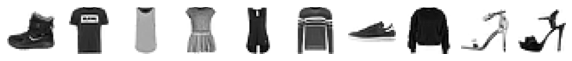

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])
# 패션 MNIST 타깃은 0 ~ 9 까지의 숫자 레이블로 구성
# 각 숫자의 의미는 아직 불명

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


패션 MNIST 에 포함된 10개의 레이블의 의미는 다음과 같다
<img src='https://github.com/JuJab/Convolution-study/assets/98221614/584ba131-0191-43d3-af69-4e62c6376bca' width='700' align='left'/>

In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


### 1-1. 로지스틱 회귀로 분류
 샘플이 60,000 개나 있기에 전체 데이터를 한 번에 훈련하는 것보다 샘플을 하나씩 꺼내서 훈련하는 방법이 효율적이다. 이럴 때는 확률적 경사 하강법이 잘 맞는다.
 >넘파이 배열의 nbytes 속성에 실제 해당 배열이 차지하는 바이트 용량이 저장되어 있다.

In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
# 28 * 28 배열을 1차원 배열로 나열하여 6000 * 784 로 재배열

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [10]:
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8305833333333335


In [11]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8313833333333334


 max_iter (반복횟수) 를 5 이상 올려도 크게 개선되지 않음을 알 수 있다.

 점수를 확인해보면 썩 만족스럽지 않다. 잠시 4장에서 확인했던 로지스틱 회귀 공식을 되새겨본다.
 
 $z = a × (Weight) + b × (Length) + c × (Diagonal) + d × (Height) + e × (Width) + f$
 
 이 식을 패션 MNIST 데이터에 맞게 변형하면 다음과 같다.
 
 $z_Tshirt = w1 × (pixel1) + w2 × (pixel2) + ... + w784 × (pixel784) + b$
 
 총 784개의 픽셀(특성)이 있으므로 긴 식이 나타난다. 가중치 개수도 많아지기에 a, b, c 대신 w1, w2, w3 과 같은 식으로 변형하였다. 마지막에 절편 b를 더한다.
 
 두 번째 레이블 바지의 경우 다음과 같이 나타낸다.
 
 $z_Pants = w1' × (pixel1) + w2' × (pixel2) + ... + w784' × (pixel784) + b'$
 
 티셔츠와 유사하지만 바지에 대한 출력을 계산하기 위해 가중치와 절편은 다른 값을 사용해야 한다. 이런 방법으로 10개의 방정식에 대한 모델 파라미터 (가중치와 절편) 을 찾을 수 있고, 이는 다음 그림과 같다.
 
 <img src='img/6/MNIST_lr.jpg' width='400'/>
 
 10 개의 선형 방정식을 모두 계산한 다음에 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있다.

### 1-2. 인공 신경망 (Artificial Neural Network, ANN)
 이미지 분류 문제에 대하여 인공 신경망이 적합하다. 그림으로 표현하면 다음과 같다.
 
 <img src='img/6/ANN.jpg' width='800'/>
  
 앞서 로지스틱 회귀를 표현한 그림과 매우 유사하다. 여기에서 z_Tshirt, z_Pants 를 z1, z2 로 바꾸었다. 클래스가 총 10개로 z10 까지 계산하고, 이를 바탕으로 클래스 예측을 하기에 신경망의 최종 값을 만든다는 의미에서 **출력층(Output Layer)** 라고 부른다.
 
 인공 신경망에서는 z 값을 계산하는 단위를 **뉴런(Neuron)** 이라고 한다. 뉴런은 선형 계산을 해주는 것이 전부다. 최근에는 뉴런이란 표현 대신 **유닛(Unit)** 이라 부르는 사람들이 많아지고 있다.
 
 pixel1, pixel2 는 x1, x2 와 같이 바꾸었다. 인공 신경망은 x1 ~ x784 까지를 **입력층(Input Layer)** 이라고 한다.
 
 z1 을 만들기 위해 pixel1 인 x1 에 곱해지는 가중치는 w1,1 이라 쓰고, z2 를 만들기 위해 pixel1 인 x1 에 곱해지는 가중치를 w2,1 라고 쓴다. 절편은 뉴런마다 하나씩으로 b1, b2, 와 같이 나타낸다.

 1장에서 소개했듯 인공 신경망은 1943년 **워런 매컬러(Warren Mcculloch)** 와 **월터 피츠(Walter Pitts)** 가 제안한 뉴런 모델로 거슬러 올라간다. 이를 **매컬러-피츠 뉴런** 이라고 부른다.
 
 <img src='img/6/neuron.jpg' width='400'/>
  
 생물학적 뉴런은 수상 돌기로부터 신호를 받아 세포체에 모은다. 신호가 어떤 임계값에 도달하면 축삭 돌기를 통하여 다른 세포에 신호를 전달한다. 앞서 그렸던 인공 신경망의 출력층에 있는 인공 뉴런과 비교하면 유사하다.
 
 하지만 생물학적 뉴런이 가중차(w1,1 w2,1)와 입력을 곱하여 출력을 만드는 것은 아니다. 인공 뉴런은 그저 생물학적 뉴런의 모양을 본뜬 수학 모델에 불과하다.
 > 딥러닝이란? 딥러닝과 인공 신경망은 거의 동의어로 사용되는 경우가 많다. 혹은 **심층 신경망(Deep Neural Network, DNN)** 을 딥러닝이라고 부른다. 심층 신경망은 여러 개의 층을 가진 인공 신경망을 말한다.

### 1-3. 텐서플로 (TensorFlow) 와 케라스 (Keras)
 **텐서플로(TensorFlow)** 는 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리이다. 이때를 기점으로 딥러닝에 대한 개발자의 관심이 늘어났고, 2016년 3월 **알파고(AlphaGo)** 가 이세돌 9단을 이겨 대중에 알려지면서 인기가 폭발적으로 높아졌다.
 
 이후 텐서플로는 2019년 9월 2.0 버전이 릴리스되었으며, 본문에서는 2.x 최신 버전을 사용한다.

 텐서플로에는 저수준 API와 고수준 API가 있다. 바로 **케라스(Keras)** 가 텐서플로의 고수준 API이다. 케라스는 2015년 3월 **프랑스와 숄레(Francois Chollet)** 가 만든 딥러닝 라이브러리이다.
 
 딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점 중 하나는 그래픽 처리 장치 GPU를 사용하여 인공 신경망을 훈련한다는 점이다. GPU는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 도움이 된다.

 케라스 라이브러리는 직접 GPU 연산을 수행하지 않는다. 대신 GPU 연산을 수행하는 다른 라이브러리를 **백엔드(Backend)** 로 사용한다. 예를 들어 텐서플로가 케라스의 백엔드 중 하나이며, 이외에 **씨아노(Theano)**, **CNTK** 와 같은 여러 딥러닝 라이브러리를 케라스 백엔드로 사용할 수 있다. 이런 케라스를 멀티-백엔드 케라스라고 부른다. 케라스 API만 익히면 다양한 딥러닝 라이브러리를 원하는대로 골라 쓸 수 있다. 이를 위해 케라스는 직관적이고 사용하기 편한 고수준 API를 제공한다.
 
 프랑소와가 구글에 합류하고 텐서플로 라이브러리에 케라스 API가 내장되었다. 텐서플로 2.0 부터는 케라스 API를 남기고 나머지 고수준 API를 모두 정리하였고, 케라스는 텐서플로의 핵심 API가 되었다. 다양한 백엔드를 지원했던 멀티-백엔드 케라스는 2.3.1 버전 이후로 더 이상 개발되지 않았고, 이제는 케라스와 텐서플로가 거의 동의어가 되었다.
 
  <img src='img/6/ten_keras.jpg' width='400'/>
  
  >**Theano** : 몬트리올 대학의 밀라(MILA) 연구소에서 만든 딥러닝 라이브러리로 2017년 11월 1.0 버전을 마지막으로 개발이 중지되었다.
  
  >**CNTK** : 마이크로소프트에서 만든 딥러닝 라이브러리로 2019년 3월 2.7 버전을 마지막으로 개발이 중지되었다.
  

### 1-4. 인공 신경망 모델 제작
 로지스틱 회귀에서는 교차 검증을 통해 모델을 평가했으나, 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용한다.
 
 이렇게 하는 이유는
 1. 딥러닝분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적이다.
 1. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸린다.
 
 어떤 딥러닝 모델은 훈련하는데 몇 시간, 심지어 며칠이 걸리기도 한다. 패션 MNIST 데이터셋은 그만큼 크지 않지만, 관례에 따라 검증 세트를 나누어 진행한다.

In [12]:
from tensorflow import keras

In [13]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [15]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


 10개의 뉴런으로 구성되는 층을 만든다. 케라스의 레이어(keras.layers) 패키지 안에는 다양한 층이 준비되어 있다. 가장 기본이 되는 층은 **밀집층(Dense Layer)** 이다. 밀집인 이유는 다음 그림에서 왼쪽에 있는 784개의 픽셀과 오른쪽에 있는 10개의 뉴런이 모두 연결된 선을 생각해보면 알 수 있다.
 
 과연 $784 × 10 = 7,840$ 개의 연결된 선을 보니 매우 빽빽하다. 이를 보고 밀집층을 연상할 수 있다.
 
 <img src='img/6/dense.jpg' width='300' align='left'/> 

 이런 층을 양쪽 뉴런이 모두 연결하고 있기에 **완전 연결층(Fully Connected Layer)** 이라고도 부른다.

In [16]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 뉴런의 개수, 뉴런 출력에 적용할 함수, 입력의 크기
# 만약 2개의 클래스로 분류하는 이진 분류라면 시그모이드 함수를 사용하기 위해 activation='sigmoid' 로 쓸 수 있음

In [17]:
# 모델 생성
model = keras.Sequential(dense)

위의 그림들에서 가중치와 절편은 표시되지 않았으나 그 존재는 꼭 기억하고 있어야 한다. 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 **활성화 함수(Activation Function)** 라고 한다. 본문에서 이 값을 a 로 표시한다.
>시그모이드 함수나 소프트맥스와 같은 활성화 함수는 뉴런의 출력에 바로 적용되기 때문에 보통 층의 일부로 나타낸다. 다만 종종 "소프트맥스 층을 적용했어" 와 같이 따로 부르는 경우도 많다.

In [18]:
# 케라스 모델은 훈련 전에 설정 단계가 존재
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 손실 함수의 종류를 반드시 지정해야 되고, 훈련 과정에서 계산하고 싶은 측정값을 지정

 로지스틱 회귀에서 이진 분류 시 이진 크로스 엔트로피 손실 함수를 사용하고, 다중 분류에서는 크로스 엔트로피 손실 함수를 사용한다. 케라스에서는 이 두 손실 함수를 각각 다음과 같이 나눈다.
- 이진 분류 : loss = 'binary_crossentropy'
- 다중 분류 : loss = 'categorical_crossentropy'

 그런데 앞에 sparse 란 단어가 붙은 이유?
 
 이진 크로스 엔트로피 손실을 위해 $-log(예측 확률) × 타겟값(정답)$ 을 취했다.
 
 이진 분류에서는 출력층의 뉴런이 하나이다. 이 뉴런이 출력하는 확률값 $a$(시그모이드 함수의 출력값)를 사용해 양성 클래스와 음성 클래스에 대한 엔트로피를 계산한다.
 
 이진 분류 의 출력 뉴런은 $a$만 출력하기에 음성 클래스에 대한 확률은 간단히 $1-a$로 구할 수 있다. 타겟값이 양성일 시 1, 음성일 시 0으로 되어 있기에 0을 곱하면 모두 0이 되어버린다. 그렇기에 음성은 1로 바꾸어 $(1-타겟값)$ 계산한다.

 <img src='img/6/cross_entropy.jpg' width='500'/> 

 출력층은 10개의 뉴런이 있고, 10개의 클래스에 대한 확률을 출력한다. 이진 분류와 달리 각 클래스에 대한 확률이 모두 출력되기에 타겟에 해당하는 확률만 남겨놓고 나머지 확률에는 모두 0을 곱한다.
 
 예를 들어 티셔츠의 경우 $a_1$에 크로스 엔트로피 손실 함수를 적용하고, 나머지 활성화 함수 출력은 모두 0으로 만든다. 이러면 티셔츠 샘플의 타겟값은 첫 번째 원소만 1이고 나머지는 모두 0인 배열로 만들 수 있다.

<img src='img/6/loss_func.jpg' width='380' align='left'/> 

 $[a1, a2, a3, a4, a5, a6, a7, a8, a9, a10] × [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$ 해당 두 값을 곱하면 다른 원소는 모두 0이 되고 $a1$만 남는다.

 결국 신경망은 티셔츠 샘플에서 손실을 낮추려면 첫 번째 뉴런의 활성화 출력 $a_1$의 값을 가능한 1에 가깝게 해야한다.
 
 두 번째 뉴런의 활성화 출력인 $a_2$만 낮추려면 앞과 똑같이 준비하면 된다. 다만 바지 샘플을 정확하게 분류하려면 신경망이 $a_2$의 출력을 가능한 높여야 한다.
 
 이와 같이 해당 클래스만 1이고, 나머지는 모두 0인 배열로 만드는 것을 **원-핫 인코딩(One-Hot-Encoding)** 이라 부른다.
 
 따라서 다중 분류에서 크로스 엔트로피 손실 함수를 사용하려면 0, 1, 2와 같은 정수 타겟값을 원-핫 인코딩으로 변환해야 한다.

In [19]:
print(train_target[:10])
# 타겟값이 정수임을 확인. 텐서플로에서는 정수값을 원-핫 인코딩으로 바꾸지 않고 사용이 가능

[7 3 5 8 6 9 3 3 9 9]


 타겟값이 정수임을 알 수 있다. 텐서플로에서는 정수값을 원-핫 인코딩으로 변환하지 않고 사용할 수 있는데, 정수 타겟값을 크로스 엔트로피 손실 계산해주는 것이 바로 'sparse_categorical_crossentropy' 이다. 빽빽한 배열 말고 정수값 하나만 사용한다는 뜻에서 sparse(희소) 라는 이름을 붙인 것으로 보인다.

In [20]:
model.fit(train_scaled, train_target, epochs=5)
# 케라스는 에포크마다 손실(loss)과 정확도(accuracy) 값을 입력해줌

Epoch 1/5
1500/1500 [==============================] - 1s 625us/step - loss: 0.6078 - accuracy: 0.7932
Epoch 2/5
1500/1500 [==============================] - 1s 603us/step - loss: 0.4740 - accuracy: 0.8395
Epoch 3/5
1500/1500 [==============================] - 1s 600us/step - loss: 0.4505 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 1s 610us/step - loss: 0.4374 - accuracy: 0.8515
Epoch 5/5
1500/1500 [==============================] - 1s 605us/step - loss: 0.4282 - accuracy: 0.8553


In [21]:
model.evaluate(val_scaled, val_target)
# evaluate : 텐서플로에서 모델의 성능을 평가하는 메서드

375/375 [==============================] - 0s 580us/step - loss: 0.4497 - accuracy: 0.8477


[0.44972455501556396, 0.8476666808128357]

# 2. 심층 신경망 (Deep Neural Network, DNN)

### 2-1. 2개의 층

In [22]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [23]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [24]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


<img src='img/6/2개층.jpg' width='600' align='left'/> 

 위의 그림과 같이 인공 신경망 모델에 층을 2개 추가하였다.
 
 앞의 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가된 것이다. 입력층과 출력층 사이에 있는 모든 층을 **은닉층(Hidden Layer)** 라고 부른다.
 
 은닉층에는 주황색 원으로 활성화 함수가 표시되어 있다. 활성화 함수는 신경망 층의 선형 방정식의 계산 값을 출력하는 함수로, 앞에 적용했던 소프트맥스 함수도 활성화 함수이다. 출력층에 적용하는 활성화 함수는 종류가 제한되어 있는데 반해 은닉층의 활성화 함수는 비교적 자유롭다. 대표적으로 시그모이드 함수와 볼 렐루(ReLU) 함수 등을 사용한다.
 >분류 문제는 클래스에 대한 확률을 출력하기 위해 활성화 함수를 사용한다. 회귀의 출력은 임의의 어떤 숫자이기에 활성화 함수를 적용할 필요가 없다. 즉 출력층의 선형 방정식의 계산을 그대로 출력하기에 Dense 층의 activation 매개변수에 아무 값도 지정하지 않는다.

 다음 2개의 선형 방정식이 있을 때 출력값 $b$가 다음 식에서 $c$를 계산하기 위해 쓰인다. 2번 식에 1번 식을 대입하면 오른쪽처럼 합쳐지는데 이러면 $b$는 사라지게 된다. $b$가 하는 일이 없는 셈이다.
 
 <img src='img/6/은닉층_1.png' width='280'/> 

 신경망도 동일하다. 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈이다. 선형 계산을 적당히 비선형적으로 비틀어 주어야 한다. 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있다.
 
 <img src='img/6/은닉층_2.jpg' width='135'/> 
 
 >인공 신경망을 그림으로 나타낼 때 활성화 함수를 생략하는 경우가 많은데, 이는 절편과 마찬가지로 번거로움을 피하기 위함이다. 즉 활성화 함수를 별개의 층으로 생각하지 않고 층에 포함되어 있다고 간주한다. 그림에 표현되지 않더라도 모든 은닉층에는 항상 활성화 함수가 존재한다.

In [25]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
# dense1 이 은닉층이고 100개의 뉴런을 가집 밀집층
# dense2 가 출력층. 10개의 클래스로 분류하기에 10개의 뉴런을 둠
# 은닉층의 뉴런은 최소한 출력층의 뉴런보다 많이 만들어야 함

### 2-2. 심층 신경망 제작
 앞서 만든 2개의 층을 Sequential 클래스에 추가하여 **심층 신경망(Deep Neural Network, DNN)** 을 만든다.

In [26]:
model = keras.Sequential([dense1, dense2])

 Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 위와 같이 dense1과 dense2를 리스트로 만들어 전달한다. 여기서 주의할 점은 출력층을 가장 마지막에 두어야 한다는 것이다. 이 리스트는 가장 처음 등장하는 은닉층에서 마지막 출력층의 순서로 나열해야 한다.
 
 
 인공 신경망의 강력한 성능은 이렇게 여러 층을 통해 입력 데이터에 대해 연속적인 학습을 진행하는 능력에서 나온다.
 
 <img src='img/6/DNN.jpg' width='400' align='left'/> 

In [27]:
# summary() 메서드를 통해 층에 대한 정보를 얻을 수 있음
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


 맨 처음 모델의 이름, 그 다음 모델에 들어있는 층이 순서대로 나열된다. 이 순서는 맨 처음 추가한 은닉층에서 출력층의 순서로 나열된다.
 
 층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력된다. 층을 만들 때 name 매개변수로 이름을 지정할 수 있고, 지정하지 않으면 케라스가 자동으로 'dense' 라고 이름을 붙인다.
 
 첫 번째 층의 출력 크기를 보면 (None, 100)이다. 첫 번째 차원은 샘플의 개수를 나타내는데, 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 한 번에 모두 훈련하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수앻한다. 바로 미니배치 경사 하강법이다. 케라스의 기본 미니배치 크기는 32개로, 이 값은 fit() 메서드에서 batch_size 매개변수로 변경할 수 있다. 따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정한다. 이렇게 신경망 측에 입력되거나 출력되는 배열의 첫 번째 차원을 배치 차원이라고 부른다.
 
 두 번째 차원은 뉴런의 개수이다. 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축된다.
 
 마지막으로 모델 파라미터 개수가 출력된다. Dense 층이기에 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있다. 그리고 뉴런마다 1개의 절편이 있다. 즉 아래와 같은 모델 파라미터 78,500개의 결과가 되는 것이다.
 
 $784 × 100(뉴런) + 100(절편) = 78,500개$
 
 두 번째 층도 모두 동일하다. 첫 번째 층을 거쳐 100개로 압축된 특성이 입력되어 모델 파라미터의 개수가 계산된다.
 
 $100 × 10(뉴런) + 10(절편) = 1,010개$
 
 summary() 메서드의 마지막에는 총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79,510개로 나온다. 은닉층과 출력층의 파라미터 개수를 합친 값이다. 아래 훈련되지 않는 파라미터(Non-trainable params)는 0으로 나온다. 간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있는데, 해당 파라미터 개수가 여기에 나타난다.

### 2-3. 층을 추가하는 다른 방법

In [28]:
# Sequential 객체 생성자 안에서 바로 Dense 객체를 만드는 경우도 많음
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
    ], name='패션 MNIST 모델')

In [29]:
model.summary()
# 모델과 층 이름만 바뀐 것을 알 수 있음

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
# add() 메서드로 하나씩 층을 추가하는 것도 가능
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [33]:
# keras 객체 생성 시 name 매개변수에 한글 이름을 주지 말 것
# 어째서인지 한글 이름을 지정하면 오류가 발생
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 986us/step - loss: 0.5715 - accuracy: 0.8089
Epoch 2/5
1500/1500 [==============================] - 1s 983us/step - loss: 0.4114 - accuracy: 0.8518
Epoch 3/5
1500/1500 [==============================] - 1s 987us/step - loss: 0.3763 - accuracy: 0.8651
Epoch 4/5
1500/1500 [==============================] - 1s 984us/step - loss: 0.3543 - accuracy: 0.8724
Epoch 5/5
1500/1500 [==============================] - 1s 977us/step - loss: 0.3374 - accuracy: 0.8783


In [34]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 722us/step - loss: 0.3483 - accuracy: 0.8754


[0.348295122385025, 0.8754166960716248]

### 2-4. 렐루 함수 (ReLU Function)

 시그모이드 함수는 끝으로 갈수록 그래프가 누워있기에 올바른 출력을 만드는데 신속하게 대응하지 못한다.
 
 특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만든다. 이를 개선하기 위해 **렐루(ReLR)** 함수가 나왔다. 렐루 함수는 입력이 양수일 경우 마치 활성화 함수가 없는 것마냥 입력을 통과시키고, 음수일 경우 0으로 만든다.
 
 <img src='img/6/Relu.jpg' width='300'/> 

 렐루 함수는 max(0,z) 와 같이 쓸 수 있다. z가 0보다 크면 z를 출력하고, z가 0보다 작으면 0을 출력한다. 이 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.
 
 앞에서 우리는 28×28 이미지 데이터를 인공 신경망에 주입하기 위해 1차원으로 펼쳤다. 케라스에서는 이 과정을 위한 Flatten 층을 제공한다. Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다. 가중치나 절편이 없기에 인공 신경망의 성능을 위해 기여하는 바는 없다. 그래도 입력층과 은닉층 사이에 추가하기에 이를 층이라고 부른다.

In [35]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
# 첫 번째 층에 있던 input_shape 매개변수가 Flatten 층으로 이동
# 또한 활성화 함수를 relu 로 변경

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


 Flatten 클래스에 포함된 모델 파라미터는 0개이다. 또한 Flatten 층을 사용하면 입력값의 차원을 짐작할 수 있는 것이 장점이다. summary() 메서드에서 784개의 입력이 첫 번째 은닉층에 전달된다는 것을 알 수 있고, 이러한 입력 데이터의 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 API의 철학 중 하나이다.

In [37]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [38]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 998us/step - loss: 0.5321 - accuracy: 0.8137
Epoch 2/5
1500/1500 [==============================] - 1s 992us/step - loss: 0.3935 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 1s 992us/step - loss: 0.3543 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 1s 978us/step - loss: 0.3324 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 1s 979us/step - loss: 0.3170 - accuracy: 0.8854


In [39]:
model.evaluate(val_scaled, val_target)
# 시그모이드 함수를 사용했을 때 비해 성능이 올라갔음을 알 수 있음

375/375 [==============================] - 0s 717us/step - loss: 0.3812 - accuracy: 0.8702


[0.3812084197998047, 0.8702499866485596]

### 2-5. 옵티마이저 (Optimizer)

 compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용한다. 이외에도 다양한 종류의 경사 하강법 알고리즘을 제공하는데 이들을 **옵티마이저(Optimizer)** 라고 부른다.
 
 옵티마이저는 tensroflow.keras.optimizers 패키지 아래 구현되어 있다.

In [40]:
# 우선 확률적 경사하강법 SGD 부터 사용해보자
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [41]:
# 다음 코드는 위의 코드와 정확히 동일
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

 확률적 경사 하강법이라고 해서 1개의 샘플씩 뽑아서 훈련하는 것이 아닌 미니배치를 사용한다.
>원래는 sgd = keras.optimizers.SGD() 처럼 SGD 클래스 객체를 만들어야 하나, 번거로움을 피하고자 'sgd' 라 지정하면 자동으로 SGD 클래스 객체를 만들어 준다.

In [42]:
# 학습률의 default 값은 0.01 이며, 0.1 로 수정하고 싶으면 다음과 같음
sgd = keras.optimizers.SGD(learning_rate=0.1)

 이외에 다양한 옵티마이저들이 있는데 많이 사용하는 옵티마이저들은 다음 그림에서 볼 수 있다.
 
 <img src='img/6/optimizer.jpg' width='450' align='left'/> 

 SGD 클래스의 momentum 의 default 값은 0인데, 이것을 0보다 큰 값으로 지정하면 이전의 그레디언트를 가속도처럼 사용하는 **모멘텀 최적화(Momentum Optimization)** 을 사용한다. 보통 momentum 매개변수는 0.9 이상을 지정한다.
 
 또한 nesterov 매개변수를 default 값 False에서 True로 하면 **네스테로프 모멘트 최적화(Nesterov Momentum Optimization)** (또는 네스테로프 가속 경사) 를 사용한다.
 
 네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다. 대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 나은 성능을 제공한다.

In [43]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

 경사가 클 때는 학습률이 높고, 최적점에 가까워질수록 학습률을 낮추면 모델이 안정적으로 수렴할 가능성이 높다. 이런 학습률을 **적응적 학습률(Adaptive Learning Rate)** 라고 한다. 이런 방식은 학습률 매개변수 튜닝의 수고를 덜 수 있다는 장점이 있다.
 
 적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop가 있다. optimizer 매개변수의 default 값은 'rmsprop' 이다.

In [44]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [45]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy') 

 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adma 이다. Adam 클래스도 keras.optimizers 패키지 아래 있으며, 적응적 학습률을 사용하는 이 3개의 클래스는 learning_rate 매개변수의 default 값 모두 0.001을 사용한다.

In [46]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5224 - accuracy: 0.8168
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3924 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3526 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3303 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3093 - accuracy: 0.8864


In [48]:
model.evaluate(val_scaled, val_target)
# RMSprop 보다 조금 나은 성능을 보임

375/375 [==============================] - 0s 789us/step - loss: 0.3424 - accuracy: 0.8767


[0.34240466356277466, 0.8767499923706055]

In [49]:
model.predict(val_scaled[:5])

1/1 [==============================] - 0s 78ms/step


array([[7.55309884e-07, 5.61593660e-09, 2.18546354e-08, 7.82410297e-08,
        2.41723001e-07, 3.30208626e-04, 4.09119050e-09, 9.74333852e-06,
        9.99658942e-01, 7.67734942e-09],
       [7.31549080e-05, 3.16879948e-07, 1.64245812e-05, 1.04069615e-08,
        1.82646399e-05, 4.29679723e-08, 2.50398407e-05, 3.95469215e-07,
        9.99866247e-01, 7.06202883e-08],
       [2.02450920e-07, 3.04630388e-09, 1.66325975e-08, 2.52421408e-08,
        2.38655162e-09, 6.87835796e-04, 2.17586216e-09, 9.99119222e-01,
        5.01939212e-06, 1.87712722e-04],
       [3.87020106e-03, 1.51119696e-03, 1.49971157e-01, 8.17517377e-03,
        5.39960980e-01, 4.82618225e-06, 2.96100646e-01, 1.23150885e-05,
        3.92847724e-04, 5.74626938e-07],
       [3.87016748e-08, 4.28869029e-09, 2.95313041e-09, 1.25658648e-08,
        5.65694780e-09, 2.31774766e-06, 3.86934998e-11, 1.23536724e-04,
        9.99873996e-01, 1.28465274e-07]], dtype=float32)

In [50]:
val_target[:5]

array([8, 8, 7, 4, 8], dtype=uint8)

# 3. 신경망 모델 훈련

### 3-1. 손실 곡선

 케라스에서는 fit() 메서드는 실행 결과를 출력한다.
 
 <keras.callbacks.History at 0x29616e479d0>
 
 이러한 결과를 출력하는데, fit() 메서드는 History 클래스 객체를 반환한다. History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있다. 이 값을 사용하여 그래프를 그릴 수 있다.

In [51]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [52]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer: # 추가할 은닉층의 여부 파악. 기본값은 없음이고 있을 시 해당 은닉층 추가
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [53]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# verbose 매개변수는 훈련 과정 출력을 조절함
# default 값은 1로 에포크마다 진행 막대와 함께 손실 등의 지표가 출력됨
# 2로 바꾸면 진행 막대를 제거하고, 0으로 하면 훈련 과정을 나타내지 않음

In [55]:
print(history.history.keys()) # history 에 손실과 정확도가 포함되어 있음을 알 수 있음

dict_keys(['loss', 'accuracy'])


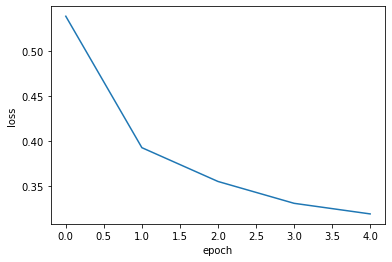

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 인덱스는 0부터 시작하므로, 0 1 2 3 4 로 5개의 에포크가 x축에 출력

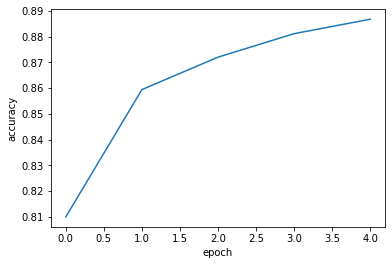

In [57]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

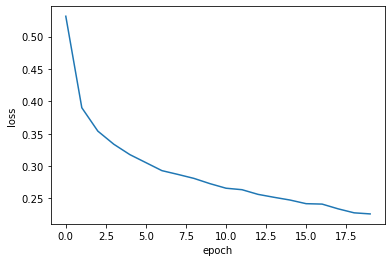

In [58]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 3-2. 검증 손실

 과대/과소적합의 문제가 있기에 훈련 세트에 대한 점수만이 아닌 검증 세트의 점수도 확인할 필요가 있다.
> 인공신경망이 최적화하는 대상은 정확도 가 아닌 손실 함수이기에, 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 존재한다. 따라서 잘 훈련되었는지 판단하려면 정확도보다 손실 함수의 값을 확인하는 것이 더 좋다.

In [59]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))

In [60]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


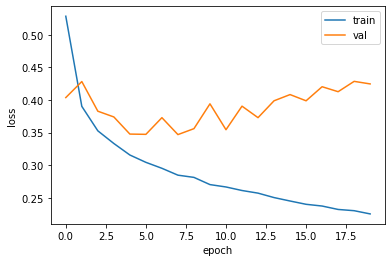

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 5 epoch 부터 검증 손실이 증가, 훈련 손실은 내려감을 확인할 수 있음.
# 과적합이 시작되는 지점임을 알 수 있음.

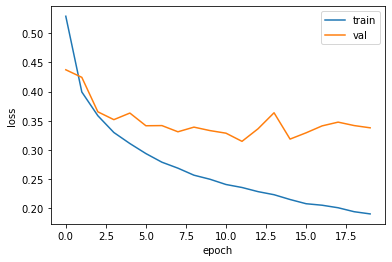

In [62]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 10 epoch 까지 손실이 줄어드는 것을 확인
# Adam 의 경우 적응적 학습률을 가지고 있기에 에포크가 진행되면서 학습률의 크기를 조정함
# default 옵티마이저인 RMSprop 보다 Adam 옵티마이저가 더 잘 맞는 것을 알 수 있음

### 3-3. 드롭아웃 (Dropout)

 **드롭아웃(Dropout)** 은 딥러닝의 아버지로 불리는 제프리 힌턴(Geoffrey Hinton)이 소개했다. 다음 그림처럼 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는다.
 
 <img src='img/6/dropout.jpg'/> 

 어떤 샘플을 처리할 때는 은닉층의 두 번째 뉴런이 드롭아웃되어 h₂출력이 사라지고, 다른 샘플 처리 시 은닉층의 첫 번째 뉴런이 드롭아웃되어 h₁출력이 사라진다. 뉴런이 랜덤하게 드롭아웃되고, 얼마나 많은 뉴런을 드롭할지는 또 다른 하이퍼파라미터로 정해진다.
 
 드롭아웃이 과대적합을 막는 이유는, 이전 층의 일부 뉴런이 랜덤하게 꺼지면서 특정 뉴런에 과대하게 의존하는 것을 줄이고 모든 입력에 대해 주의를 기울이게 되기 때문이다. 즉 특정 패턴의 반복을 줄일 수 있다는 말로 보다 더 안정적인 예측을 만들 수 있다.
 
 keras에서는 keras.layers 패키지 아래 Dropout 클래스를 제공하며, 어떤 층 뒤에 두어 이 층의 출력을 랜덤하게 0으로 만든다. 드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없다.

In [63]:
model = model_fn(keras.layers.Dropout(0.3)) # Dropout(0.3) 은 30% 정도를 드롭아웃 한다는 의미
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


 위에서 보이듯 드롭아웃 층은 훈련되는 모델 파라미터가 없고, 입력과 출력의 크기 또한 같다. 일부 출력을 0으로 만들뿐 전체 출력 배열의 크기를 바꾸지는 않는다.
 
 훈련이 끝난 뒤 평가나 예측 수행 시에는 드롭아웃을 적용해선 안 된다. 훈련된 모든 뉴런을 사용해야 올바른 에측을 수행할 수 있다. 하지만 훈련 후 드롭아웃 층을 뺄 필요는 없다. 텐서플로와 케라스는 평가와 예측 시 자동으로 드롭아웃을 적용하지 않는다.

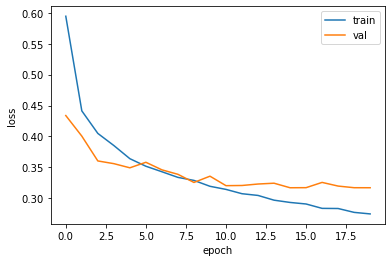

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 과대적합이 확실하게 줄어들었음을 확인할 수 있음
# 10 epoch 정도에서 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지되고 있기에 과대적합 추측이 가능
# 10 횟수가 가장 적당함을 알 수 있음

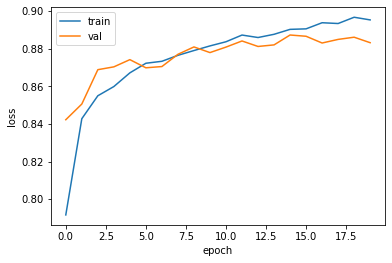

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 3-4. 모델 저장과 복원

In [66]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                   validation_data=(val_scaled, val_target))

 keras 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공한다. 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5' 일 경우 HDF5 포맷으로 저장한다.

In [67]:
model.save_weights('model-weights.h5')

In [68]:
model.save('model-whole.h5')
# 모델 구조와 파라미터를 함께 저장하는 save() 메서드도 제공함
# 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 위와 마찬가지로 HDF5 포맷으로도 저장할 수 있음

In [69]:
# 저장된 파일에서 훈련된 모델 파라미터를 읽어 사용
# 이 때는 load_weights() 메서드를 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
# load_weights() 를 사용하려면 save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져야 한다. 
# 그렇지 않으면 에러가 발생한다.

 keras 에서 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환한다. 패션 MNIST 데이터셋이 다중 분류 문제이기 때문이다. (이진 분류 문제라면 양성 클래스에 대한 확률 하나만 반환한다.)
 
 > keras 모델에는 확률이 아닌 클래스를 예측해주는 predict_classes() 메서드가 있으나 사라질 예정이기에 케라스 문서에서 권장하는 대로 predict() 메서드를 사용한다.

 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기에 predict() 메서드는 (12000, 10) 크기의 배열을 반환한다.
 > 모델 파라미터를 읽은 후 evaluate() 메서드를 사용하여 정확도를 출력할 수 있다. 그러나 해당 메서드는 손실을 계산하기 위해 반드시 먼저 compile() 메서드를 실행해야 된다. 여기서는 새로운 데이터에 대해 정확도만 계산하면 되는 상황이라고 가정한다.

In [70]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 625us/step
0.8771666666666667


 predict() 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용한다. 이 함수는 배열에서 가장 큰 값의 인덱스를 반환한다.
 
 argmax() 함수의 axis=-1 은 배열의 마지막 차원을 따라 최대값을 고른다. 검증세트는 2차원 배열이기에 마지막 차원은 1이 된다.
 
 <img src='img/6/argmax.jpg' width='250'/> 
 
 axis=1 이면 열을 따라 각 행의 최댓값의 인덱스를 선택하고, axis=0 이면 행을 따라 각 열의 최댓값의 인덱스를 선택한다.
 
 그 다음 라인에서 argmax() 로 고른 인덱스(val_labels)와 타깃(val_target)을 비교하여, 같으면 1, 다르면 0 을 출력한다. 이를 평균하면 정확도가 된다.

In [71]:
# 파일에서 저장된 모델을 읽을 때는 load_model() 함수를 사용
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 732us/step - loss: 0.3347 - accuracy: 0.8772


[0.3347378969192505, 0.8771666884422302]

> load_model() 함수는 파라미터뿐 아니라 모델 구조와 옵티마이저까지 모두 복원하기에 evaluate() 메서드를 사용할 수 있다. 텐서플로 2.3에서는 load_model() 의 버그 때문에 evaluate() 를 사용하기 전에 compile() 메서드를 호출해야한다.

### 3-5. 콜백 (Callback)

 결국 20번의 에포크 동안 훈련을 하고, 과대적합 되지 않는 지점을 찾아 해당 에포크만큼 다시 훈련하였다. 모델을 두 번씩 훈련하지 않고 끝내는 방법이 바로 **콜백(Callback)** 클래스이다.

 fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용하는 클래스로, 여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저정한다. save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.
 
 검증 점수의 매개변수는 monitor='val_loss' 로 이것은 default 값이다. 정확도를 기준으로 하고 싶으면 monitor='val_accuracy' 로 지정하면 된다.

In [72]:
# 모델을 'best-model.h5' 로 지정하여 콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
         callbacks=[checkpoint_cb])
# checkpoint_cb 객체를 만들어 callbacks 매개변수에 리스트로 감싸서 전달

In [73]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 724us/step - loss: 0.3175 - accuracy: 0.8842


[0.3174973130226135, 0.8841666579246521]

 보다 편해졌으나 여전히 20번의 에포크 동안 훈련이 진행된다. 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 커지기만 하기에 훈련을 지속할 필요가 없다. 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 **조기 종료(Early Stopping)** 라고 부르며, 딥러닝 분야에서 널리 사용한다.
 
 조기 종료는 훈련 에포크를 제한하는 동시에 모델이 과대적합되는 것을 막아주기에 규제 방법 중 하나로 생각할 수도 있다.
 
 케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공하며, 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다. patience=2 로 지정하면 2번 연속 검증 점수가 향상되지 않을 시 훈련을 중지한다. 또한 restore_best_weights 매개변수를 True로 주면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.
 
 EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있으며, 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.

In [74]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [75]:
# 몇 번째 에포크에서 중지되었는지 다음 속성에서 확인할 수 있음
print(early_stopping_cb.stopped_epoch)

7


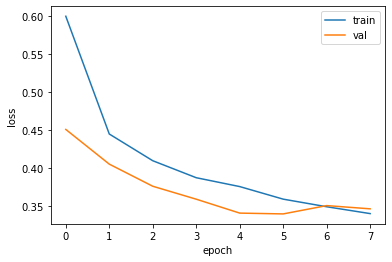

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [77]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 727us/step - loss: 0.3398 - accuracy: 0.8777


[0.339790940284729, 0.8776666522026062]